In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Data Exploratory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


None

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Female    5000
Male      5000
Name: Gender, dtype: int64

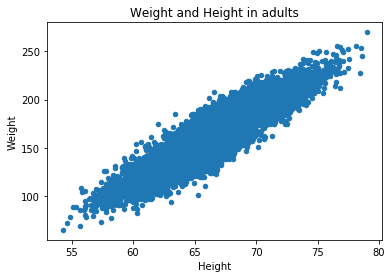

In [2]:
df = pd.read_csv('weight-height.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['Gender'].value_counts())

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

## Onehot encoding for Categorical Features

In [3]:
display(df[['Gender']].head())

display(pd.get_dummies(df['Gender']).head())

display(pd.get_dummies(df['Gender'], prefix='Gender').head())

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations
- Neural network works better with feature has scale in range [0,1]

In [4]:
df.describe().round(2)

,Height,Weight
count,10000.00,10000.00
mean,66.37,161.44
std,3.85,32.11
min,54.26,64.70
25%,63.51,135.82
50%,66.32,161.21
75%,69.17,187.17
max,79.00,269.99


### MinMax Scaler
After scaling min = 0, max = 1
$$x_{mms}(i) = \frac{x(i) - min(X)}{max(X) - min(X)}$$

In [5]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,0.47,0.49
std,3.85,32.11,0.16,0.16
min,54.26,64.70,0.00,0.00
25%,63.51,135.82,0.35,0.37
50%,66.32,161.21,0.47,0.49
75%,69.17,187.17,0.60,0.60
max,79.00,269.99,1.00,1.00


### Standard Scaler
After scaling mean = 0, std = 1.0

$$x_{ss}(i) = \frac{x(i) - \mu}{\sigma}$$

- $\mu$ = mean

$$\mu = \frac{1}{N}\sum\limits_{i=1}^nx(i)$$

- $\sigma$ = standard deviation

$$\sigma = \sqrt{\frac{1}{N}\sum\limits_{i=1}^n(x(i) - \mu)^2}$$

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])

df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,0.47,0.49,0.00,0.00
std,3.85,32.11,0.16,0.16,1.00,1.00
min,54.26,64.70,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,0.60,0.60,0.80,0.73
max,79.00,269.99,1.00,1.00,3.38,3.28


## Plot

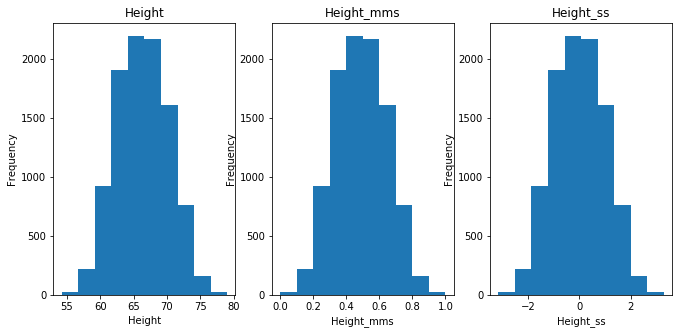

In [7]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)